In [84]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (16,9)

In [2]:
ac = pd.read_csv('./airports-extended.csv')
ac = ac[ac["country"]== "Mexico"]
a = pd.read_html("https://es.wikipedia.org/wiki/Anexo:Aeropuertos_de_M%C3%A9xico")

,ID,name,region,country,code3,code4,lat,long,altitude,timezone,UTC,TZ,type,source
1733,1783,General Juan N Alvarez International Airport,Acapulco,Mexico,ACA,MMAA,16.757099,-99.753998,16,-6,S,America/Mexico_City,airport,OurAirports
1734,1784,Del Norte International Airport,Monterrey,Mexico,NTR,MMAN,25.865601,-100.237000,1476,-6,S,America/Mexico_City,airport,OurAirports
1735,1785,Jesús Terán Paredo International Airport,Aguascalientes,Mexico,AGU,MMAS,21.705601,-102.318001,6112,-6,S,America/Mexico_City,airport,OurAirports
1736,1786,Bahías de Huatulco International Airport,Huatulco,Mexico,HUX,MMBT,15.775300,-96.262604,464,-6,S,America/Mexico_City,airport,OurAirports
1737,1787,General Mariano Matamoros Airport,Cuernavaca,Mexico,CVJ,MMCB,18.834801,-99.261299,4277,-6,S,America/Mexico_City,airport,OurAirports


In [47]:
# AEROPUERTOS INTERNACIONALES
clase1 = a[0]
clase1.columns = clase1.columns.droplevel()
clase2 = a[2]
clase2.columns = clase2.columns.droplevel()
clase3 = a[4]
clase3.columns = clase3.columns.droplevel()

ai = ac.merge(clase1[["Operador","IATA"]], left_on="code3", right_on="IATA")
ai = pd.concat([ai,ac.merge(clase2[["Operador","IATA"]], left_on="code3", right_on="IATA")])
ai = pd.concat([ai,ac.merge(clase3[["Operador","IATA"]], left_on="code3", right_on="IATA")])

,ID,name,region,country,code3,code4,lat,long,altitude,timezone,UTC,TZ,type,source,Operador,IATA
0,1785,Jesús Terán Paredo International Airport,Aguascalientes,Mexico,AGU,MMAS,21.705601,-102.318001,6112,-6,S,America/Mexico_City,airport,OurAirports,GAP,AGU
1,1792,Bachigualato Federal International Airport,Culiacan,Mexico,CUL,MMCL,24.764500,-107.474998,108,-7,S,America/Mazatlan,airport,OurAirports,OMA,CUL
2,1796,Abraham González International Airport,Ciudad Juarez,Mexico,CJS,MMCS,31.636101,-106.429001,3904,-7,S,America/Mazatlan,airport,OurAirports,OMA,CJS
3,1797,General Roberto Fierro Villalobos Internationa...,Chihuahua,Mexico,CUU,MMCU,28.702900,-105.964996,4462,-7,S,America/Mazatlan,airport,OurAirports,OMA,CUU
4,1800,Cozumel International Airport,Cozumel,Mexico,CZM,MMCZ,20.522400,-86.925598,15,-5,S,America/Cancun,airport,OurAirports,ASUR,CZM


In [48]:
start_location_lat = ac[ac['country']=='Mexico']['lat'].median()
start_location_long = ac[ac['country']=='Mexico']['long'].median()

In [59]:
# AEROPUERTOS INTERNACIONALES

m = folium.Map(location =[start_location_lat, start_location_long], zoom_start=4)

asa = folium.FeatureGroup(name="ASA")
oma = folium.FeatureGroup(name="OMA")
gap = folium.FeatureGroup(name="GAP")
asur = folium.FeatureGroup(name="ASUR")
gacm = folium.FeatureGroup(name="GACM")
otros = folium.FeatureGroup(name="otros")

for row in ai[ai['Operador']=='ASA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='blue')).add_to(asa)
for row in ai[ai['Operador']=='OMA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='red')).add_to(oma)
for row in ai[ai['Operador']=='GAP'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='green')).add_to(gap)
for row in ai[ai['Operador']=='ASUR'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='orange')).add_to(asur)
for row in ai[ai['Operador']=='GACM'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='purple')).add_to(gacm)
for row in ai[~(ai['Operador'].isin(["ASA", "OMA", "GAP", "ASUR", "GACM"]))].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='black')).add_to(otros)
    
m.add_child(asa)
m.add_child(oma)
m.add_child(gap)
m.add_child(asur)
m.add_child(gacm)
m.add_child(otros)

m.add_child(folium.map.LayerControl())

In [56]:
nacionales = a[5]
an = ac.merge(nacionales[["Operador","IATA"]], left_on="code3", right_on="IATA")

In [61]:
# AEROPUERTOS NACIONALES

m = folium.Map(location =[start_location_lat, start_location_long], zoom_start=4)

asa = folium.FeatureGroup(name="ASA")
oma = folium.FeatureGroup(name="OMA")
gap = folium.FeatureGroup(name="GAP")
asur = folium.FeatureGroup(name="ASUR")
gacm = folium.FeatureGroup(name="GACM")
otros = folium.FeatureGroup(name="otros")

for row in an[an['Operador']=='ASA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='blue')).add_to(asa)
for row in an[an['Operador']=='OMA'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='red')).add_to(oma)
for row in an[an['Operador']=='GAP'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='green')).add_to(gap)
for row in an[an['Operador']=='ASUR'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='orange')).add_to(asur)
for row in an[an['Operador']=='GACM'].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='purple')).add_to(gacm)
for row in ai[~(ai['Operador'].isin(["ASA", "OMA", "GAP", "ASUR", "GACM"]))].itertuples():
    folium.Marker([row.lat,row.long] , tooltip = row.name, icon = folium.Icon(color='black')).add_to(otros)
    
m.add_child(asa)
m.add_child(oma)
m.add_child(gap)
m.add_child(asur)
m.add_child(gacm)
m.add_child(otros)

m.add_child(folium.map.LayerControl())

<AxesSubplot:xlabel='IATA', ylabel='2020[12]\u200b'>

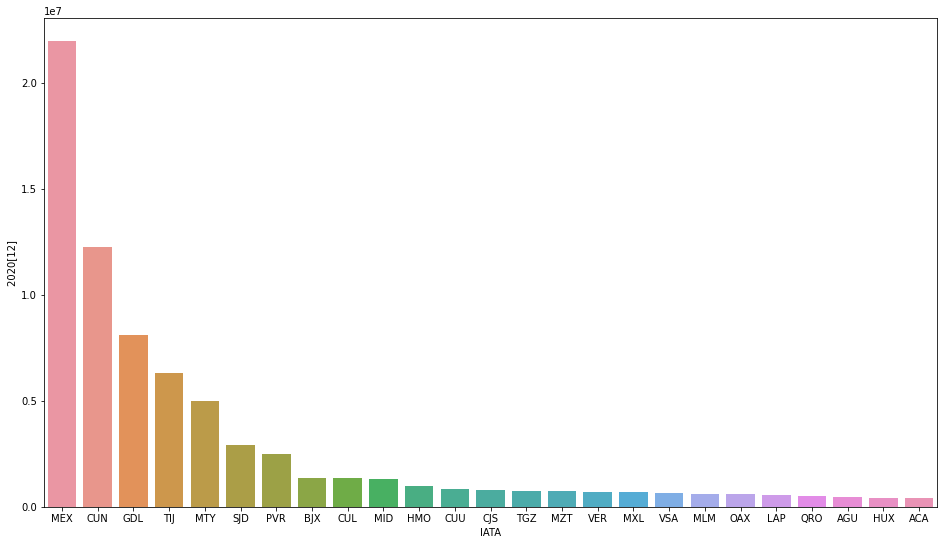

In [86]:
## Transporte nacional
vuelos_nacionales= a[10]
sns.barplot(x=vuelos_nacionales["IATA"], y=vuelos_nacionales["2020[12]\u200b"])

<AxesSubplot:xlabel='2020', ylabel='Aeropuerto'>

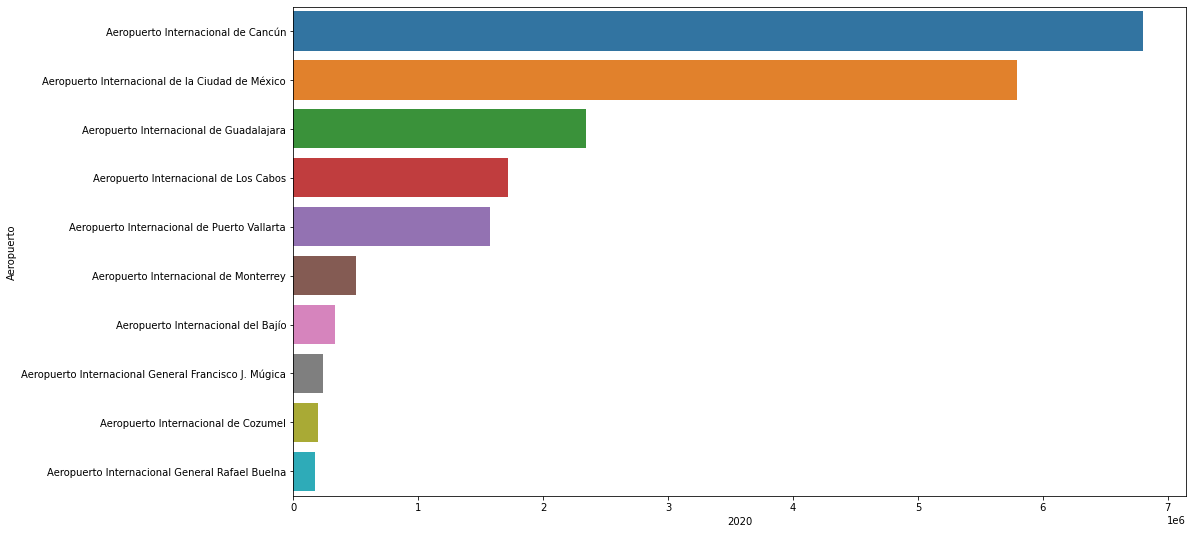

In [93]:
vuelos_internacionales=a[11]
sns.barplot(y=vuelos_internacionales["Aeropuerto"], x=vuelos_internacionales["2020"])